<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## US Election Polls - EDA & Visualisation



In this exercise, we will be looking at data from the US 2012 presidential election.

The data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

    - Who was being polled and what was their party affiliation?
    - Did the poll results favor Romney or Obama?
    - How do undecided voters effect the poll?
    - How did voter sentiment change over time?




#### 1. Import the required libraries

In [1]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


#### 2. Import & inspect the data

The data for the polls was obtained from HuffPost Pollster. You can check their website [here](http://elections.huffingtonpost.com/pollster).

In [2]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv("../../data/polls.csv")

# Let's get a glimpse at the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              586 non-null    int64  
 1   Pollster                586 non-null    object 
 2   Start Date              586 non-null    object 
 3   End Date                586 non-null    object 
 4   Entry Date/Time (ET)    586 non-null    object 
 5   Number of Observations  564 non-null    float64
 6   Population              586 non-null    object 
 7   Mode                    586 non-null    object 
 8   Obama                   586 non-null    float64
 9   Romney                  586 non-null    float64
 10  Undecided               423 non-null    float64
 11  Other                   202 non-null    float64
 12  Pollster URL            586 non-null    object 
 13  Source URL              584 non-null    object 
 14  Partisan                586 non-null    ob

Great! Now let's get a quick look with .head()

In [3]:
# Preview DataFrame
poll_df.head()

,Unnamed: 0,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


#### 3. Get a quick visualization overview of the affiliation for the polls.

Let's go ahead and get a quick visualization overview of the affiliation for the polls.

C:\Users\brian.ohalloran\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\brian.ohalloran\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


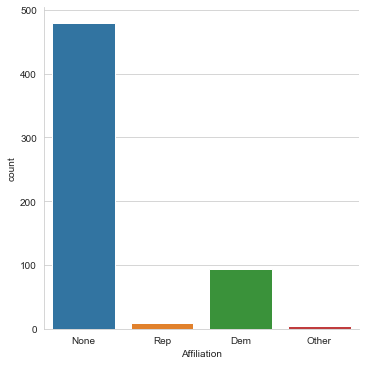

In [4]:
# Factorplot the affiliation
sns.factorplot('Affiliation',data=poll_df, kind="count")

Looks like we are overall relatively neutral, but still leaning towards Democratic Affiliation, it will be good to keep this in mind. 

#### 4. Repeat, sorting by Population (if using seaborn, use 'hue').

Let's see if sorting by the Population hue gives us any further insight into the data.

C:\Users\brian.ohalloran\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


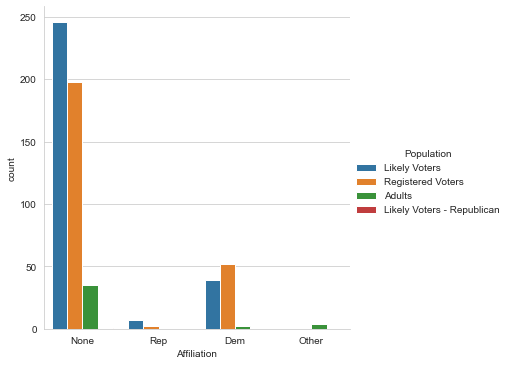

In [5]:
# Factorplot the affiliation by Population
sns.catplot('Affiliation',data=poll_df,hue='Population', kind="count")

Looks like we have a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled. 

#### 5. Take a look at the averages (plot & numbers) for Obama, Romney, and the polled people who remained undecided.

<AxesSubplot:>

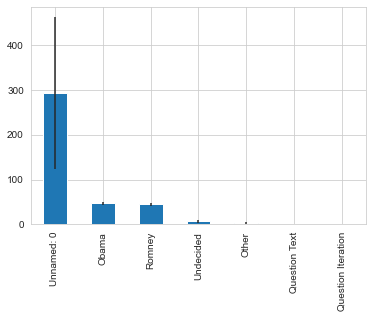

In [6]:
# First we'll get the average
avg = pd.DataFrame(poll_df.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)

# After that let's get the error
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

In [7]:
# Concatenate our Average and Std DataFrames
poll_avg = pd.concat([avg,std],axis=1)

#Rename columns
poll_avg.columns = ['Average','STD']

#Show
poll_avg

,Average,STD
Unnamed: 0,292.500000,169.307905
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

#### 6. Plot a simple time series of the voter sentiment by plotting the candidate polling versus the Poll End Dates. 

Note: The time is in reverse chronological order. Also keep in mind the multiple polls per end date.

<AxesSubplot:xlabel='End Date'>

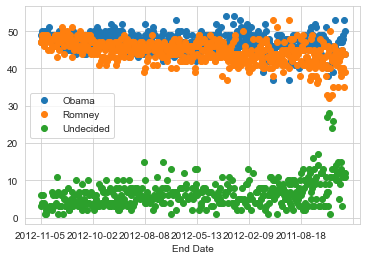

In [8]:
# Quick plot of sentiment in the polls versus time.
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')

In [19]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [20]:
heights = np.random.rand(200)

In [21]:
def plot_means(sample_size):
    true_mean = np.mean(heights)

    mean_heights = []
    for n in range(5,sample_size):
        for j in range(30):
            mean_height = np.mean(np.random.choice(heights, n, replace=False))
            mean_heights.append((n, mean_height))
    
    sample_height = pd.DataFrame(mean_heights, columns=['sample_size', 'height'])

    sample_height.plot.scatter(x='sample_size', y='height', figsize=(14, 4), alpha=0.5)
    plt.axhline(y=true_mean, c='r')
    plt.title("The Bias and Variance of the Mean Estimator")
    plt.show()

AttributeError: module 'matplotlib' has no attribute 'axhline'

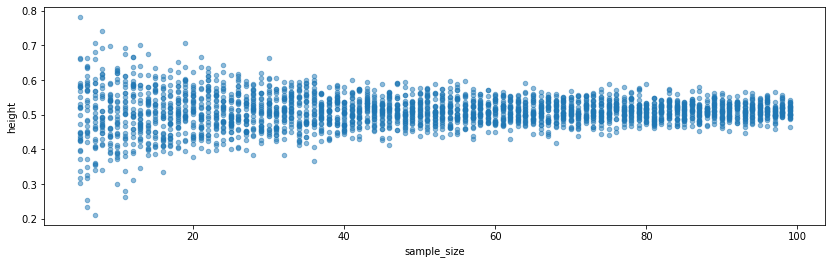

In [22]:
x = plot_means(100)

In [24]:
from scipy.stats import norm

x_axis = np.arange(-10, 10, .001)
x_axis

array([-10.   ,  -9.999,  -9.998, ...,   9.997,   9.998,   9.999])

In [25]:
plt.plot(x_axis)

AttributeError: module 'matplotlib' has no attribute 'plot'